## Import required libraries

In [1]:
import warnings
warnings.filterwarnings("ignore")
import os
os.environ["OMP_NUM_THREADS"] = "1"

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans

## Load the dataset

In [2]:
df = pd.read_csv('Iris.csv', index_col = 'Id')
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


## Perform EDA

In [3]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [4]:
df.shape

(150, 5)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


In [6]:
df.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

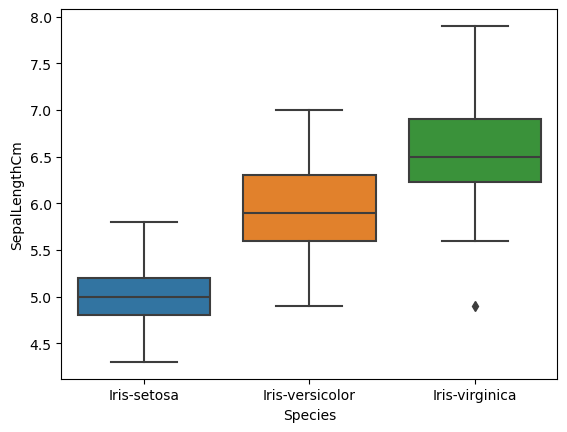

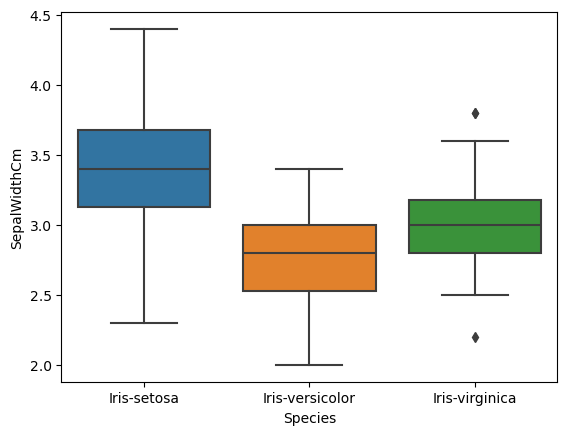

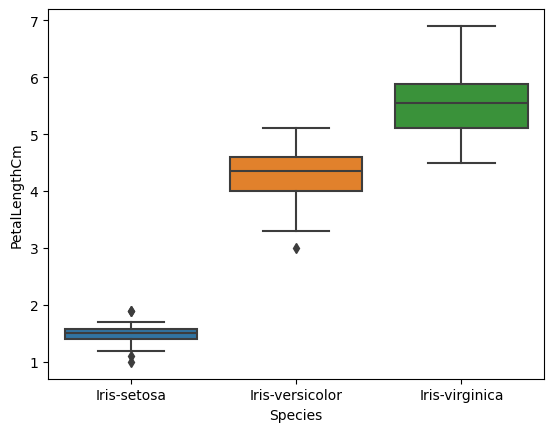

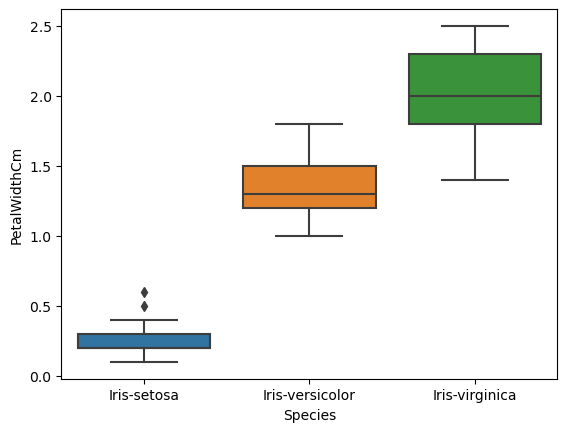

In [7]:
plot_col = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
for col in plot_col:
    sns.boxplot(x="Species", y=col ,data=df)
    plt.show()

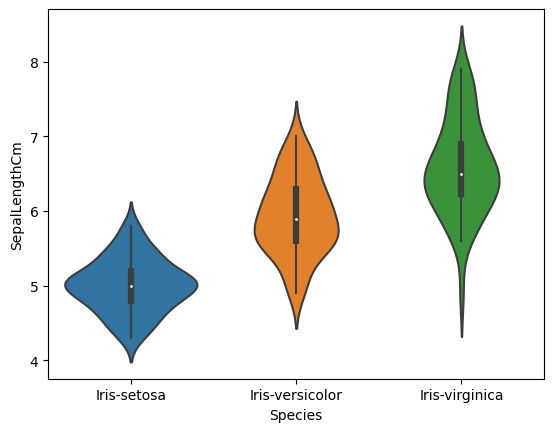

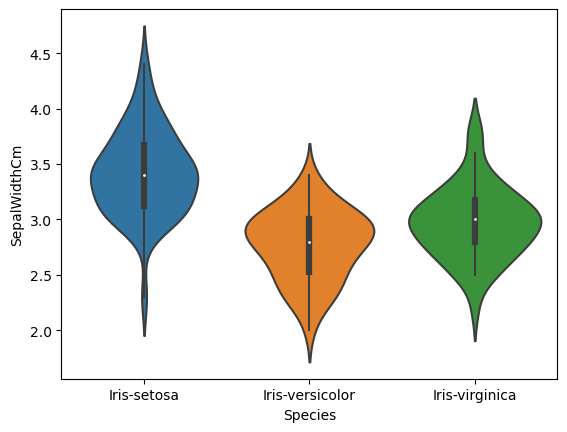

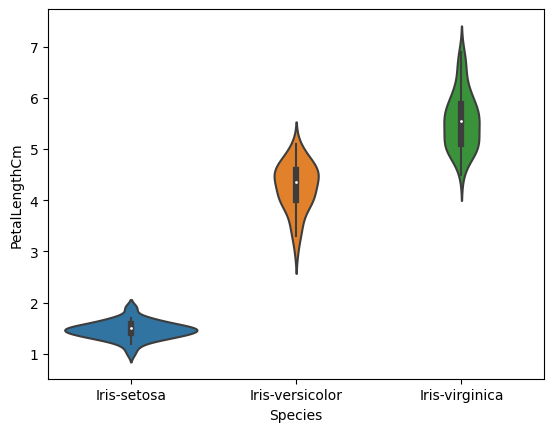

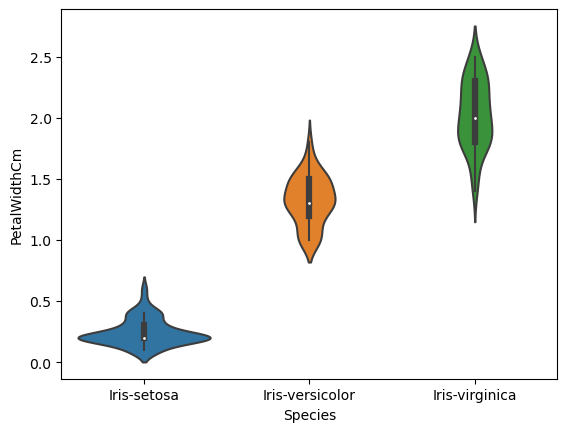

In [8]:
for col in plot_col:
    sns.violinplot(x="Species", y=col ,data=df)
    plt.show()

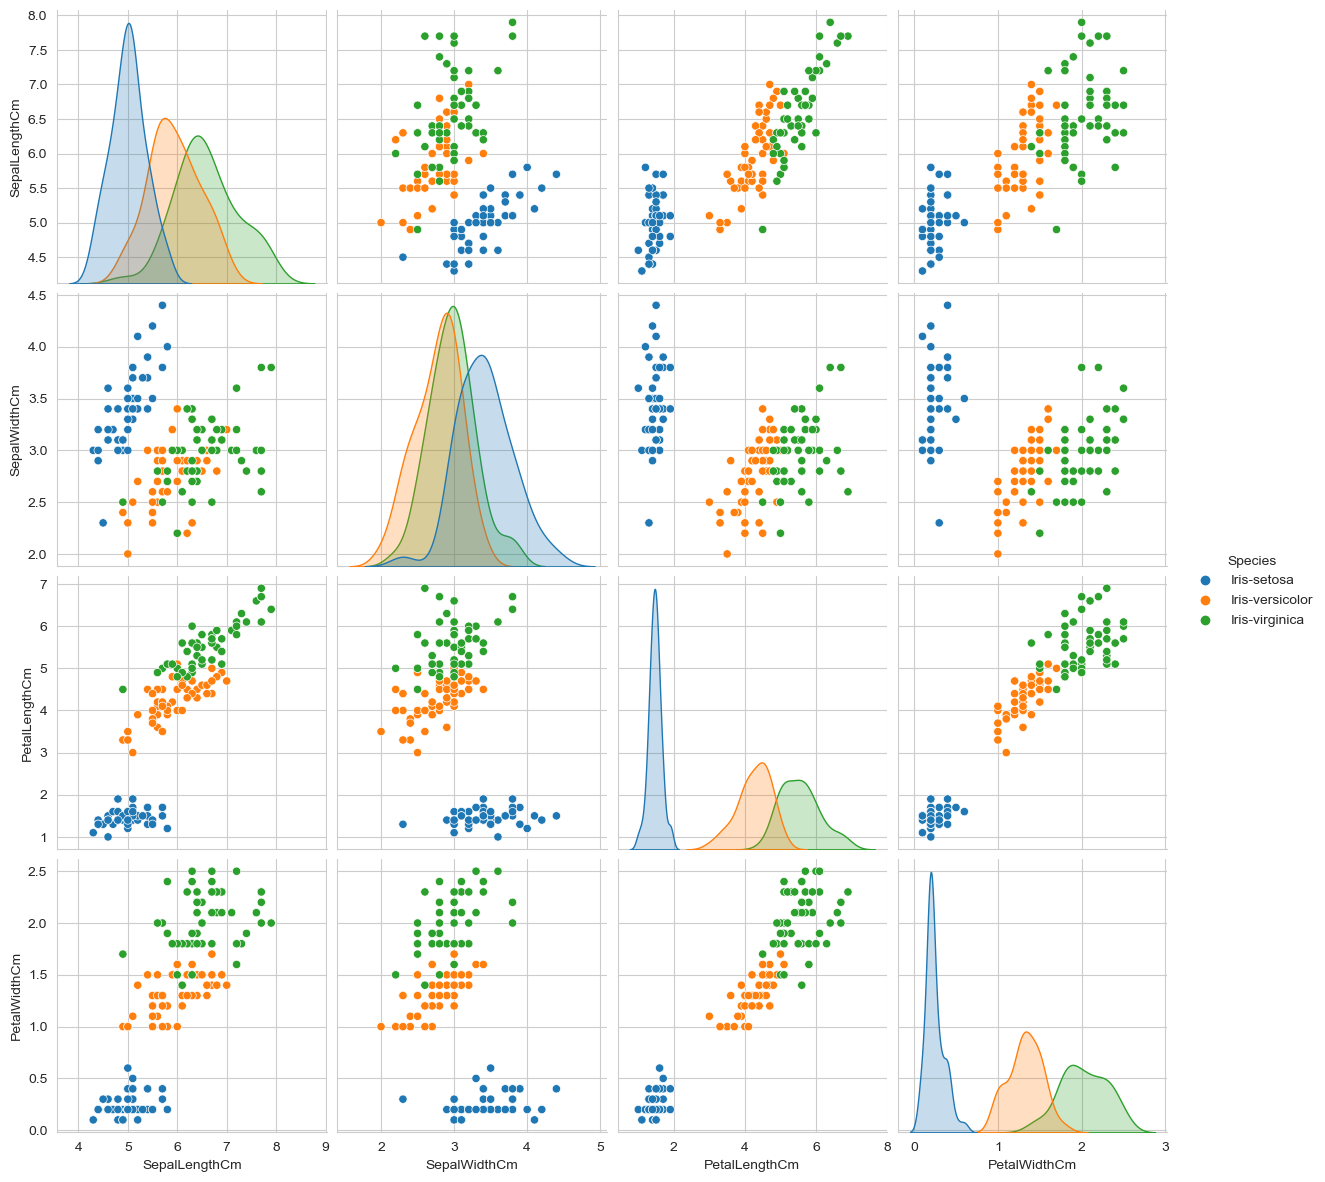

In [9]:
sns.set_style("whitegrid")
sns.pairplot(df,hue="Species",size=3);
plt.show()

## Verticle split to create Features and Target

In [10]:
target = 'Species'
X = df.drop(columns = target)
y = df[target]

## Apply KMeans clustering

In [11]:
wcss = []

for i in range(1, 21):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

In [12]:
wcss

[680.8243999999996,
 152.36870647733915,
 78.94084142614601,
 57.317873214285726,
 46.535582051282034,
 38.930963049671746,
 34.36020891600983,
 30.02341635819898,
 28.145502489617765,
 25.951544372294375,
 24.250438662945246,
 23.22320612136402,
 21.535493561993565,
 20.626181064306053,
 19.145423659673657,
 17.89443686868687,
 17.152040404040402,
 15.972067757406009,
 15.784224192474197,
 14.742468253968257]

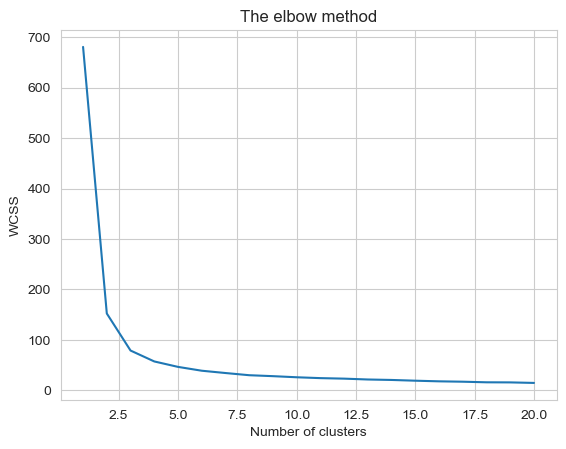

In [13]:
plt.plot(range(1, 21), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

## Implement final KMeans clustering with best params

In [14]:
final_kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 42)

In [15]:
final_fit = final_kmeans.fit_predict(X)

In [16]:
df['Prediction'] = final_kmeans.fit_predict(X)
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Prediction
Id,,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa,1
2,4.9,3.0,1.4,0.2,Iris-setosa,1
3,4.7,3.2,1.3,0.2,Iris-setosa,1
4,4.6,3.1,1.5,0.2,Iris-setosa,1
5,5.0,3.6,1.4,0.2,Iris-setosa,1


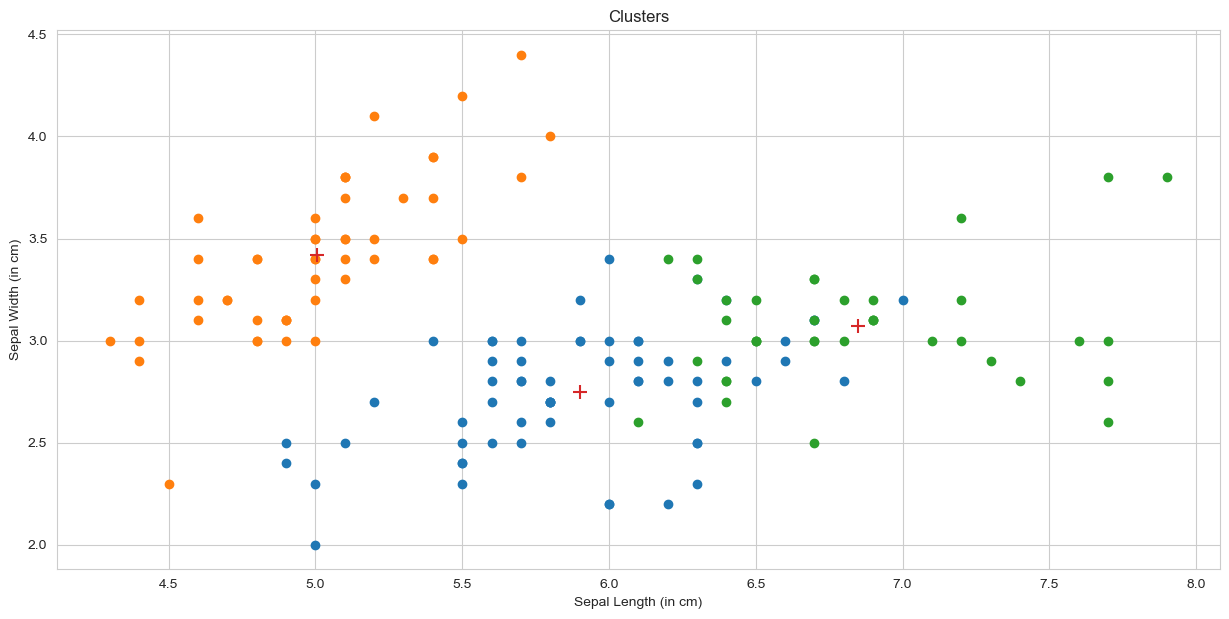

In [17]:
fig, ax = plt.subplots(figsize=(15,7)) 
plt.scatter(x=df[df['Prediction'] == 0]['SepalLengthCm'],
            y=df[df['Prediction'] == 0]['SepalWidthCm'])


plt.scatter(x=df[df['Prediction'] == 1]['SepalLengthCm'],
            y=df[df['Prediction'] == 1]['SepalWidthCm'])


plt.scatter(x=df[df['Prediction'] == 2]['SepalLengthCm'],
            y=df[df['Prediction'] == 2]['SepalWidthCm'])

plt.scatter(x=final_kmeans.cluster_centers_[:, 0], y=final_kmeans.cluster_centers_[:, 1], marker = '+', s = 100)
ax.set_ylabel('Sepal Width (in cm)')
ax.set_xlabel('Sepal Length (in cm)')
plt.title('Clusters')
plt.show()